In [8]:
# Dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib as mpl

# pyplot
import matplotlib.pyplot as plt

In [9]:
# Load dataset
dataset = sklearn.datasets.fetch_openml("mnist_784", version = 1, as_frame = False)

/Users/leevi/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
# Let's investigate what kinds of contents the dataset has:
print(dataset.keys())

# In the dataset's contents, the "data" element contains 70,000 images of hand-written digits (0..9).
# The "target" element is an array (=list) of 70,000 labels that tell which digit each image is

# Following a common convention, let's call the images in the "data" elements as X,
# and the labels in the "target" elements as y:
X = dataset["data"]
y = dataset["target"]

# Change the targets' data type from text to numbers, because most machine learning
# algorithms have been programmed to operate on numbers:
y = y.astype(np.uint8)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


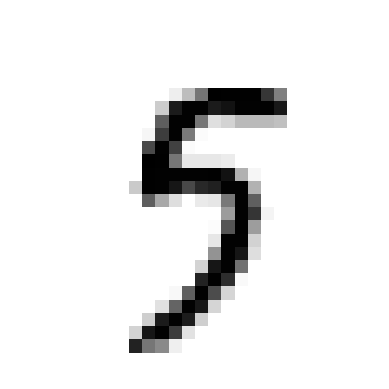

This image has been labelled as 5


In [27]:
# We can have a look what these images look like:

index = 420          # Any value between 0 and 69999 can be used here (there are 70,000 images)
image = X[index]
label = y[index]

# Rearrange the image's 784 pixels into a 28x28 grid:
image_reshaped = image.reshape(28,28)

# Now display the image and its correct label:
plt.imshow(image_reshaped, cmap="binary")        # Define that the image uses a binary color map
plt.axis("off")                                  # Define that we do not need x and y axes this time
plt.show()                                       # Now show the image
print("This image has been labelled as " + str(label))  # Also print what this digit's label is in the dataset

In [23]:
# Now let's start training!

# We'll start by training a classifier without cross-validation

# Split the dataset to fixed training and test sets:
# Train set is the one that we'll use to train our digit classifier
# Test set is the one that we'll use to find out how well our classifier works.

# We'll use the first 60000 images for training, and everything after them for testing:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [24]:
# We'll train a "stochastic gradient descent" (SGD) classifier with the train set:
# More about stochastic gradient descent:
# Video: https://www.youtube.com/watch?v=i62czvwDlsw
# Text: https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31

# Import the library of the classifier:
from sklearn.linear_model import SGDClassifier

# Create one empty classifier (that will be trained later):
classifier = SGDClassifier(random_state = 42)

In [25]:
# Training:

classifier.fit(X_train, y_train)                # Train the classifier with our training data (images and their correct labels)

# NOTE: Training takes time! The 3rd command may take 1-2 minutes to run.

SGDClassifier(random_state=42)

In [29]:
# Let's test how the classifier classifies ("predicts") the label of the image that we looked at above:

classifier.predict([image])

# When you run this code cell, the output of this command will look something like this:
#    array([4], dtype=uint8)
# The classifier's prediction is within the [] marks. In the line above, the prediction is that the image has digit 4.


array([9], dtype=uint8)

In [30]:
# Let's measure how well the classifier performs overall, using the entire test set

# 2-fold cross-validation:
# The right way to measure performance is to test the performance multiple times, with different splits
# into smaller train and tests. Then we'll get several performance values, and we can use their
# average as the "final" performance. These splits are called "folds", and the process of repeated testing
# is called "cross-validation"

# Let's measure SGD's performance using 2 repeated trainings and tests. This is called
# "3-fold cross-validation". Scikit-learn has readymade function for it, callewd cross_val_score(),
# which we now will import into our project:

from sklearn.model_selection import cross_val_score

# Let's use this function. Here are the arguments that we will giving to it:
#   our classifier that we created above (classifier)
#   our training data's images (X_train)
#   our training data's correct labels (y_train)
#   number of folds that we want to use (3)
#   the performance metric that we want to use ("accuracy")
cross_val_score(classifier, X_train, y_train, cv=2, scoring="accuracy")

# NOTE: The command takes long to run, because it trains the classifier 3 times.




array([0.8795    , 0.88853333])

In [31]:
# Confusion matrix: Analysing where the errors happen

# If we had a perfect classifier, the output would be [1.000, 1.000, 1.000].
# Of course we want to know where the errors are: what values does our classifier misclassify?
# We can do that with by pringint  "confusion matrix"

# Let's train our classifier again, this time getting out more data about its behaviour:
# after every fold of training, get labels that the classifiers give to every image that they analyse:

from sklearn.model_selection import cross_val_predict
y_predictions = cross_val_predict(classifier, X_train, y_train, cv=2)

In [34]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train,y_predictions)

# The confusion matrix tells how many images are misclassified:
# Every row represents actual labels, and every column represents predicted labels.
# Let's have a look:
conf_matrix

array([[5644,    0,   42,   17,   19,   26,   39,   11,   95,   30],
       [   2, 6432,   47,   41,    7,   46,   13,   22,  111,   21],
       [  51,   59, 5009,  164,   85,   34,  133,  106,  275,   42],
       [  37,   14,  207, 5336,   15,  156,   28,  116,  142,   80],
       [  15,   19,   45,   19, 5330,   18,   40,   27,   85,  244],
       [  70,   19,   45,  347,   77, 4329,  146,   40,  264,   84],
       [  39,   11,   38,   15,   49,   99, 5608,    3,   53,    3],
       [  25,   11,   50,   33,   90,   12,    5, 5815,   36,  188],
       [  40,   84,  192,  194,   47,  299,   73,   57, 4743,  122],
       [  26,   18,   40,  144,  220,   56,    0,  564,   86, 4795]])

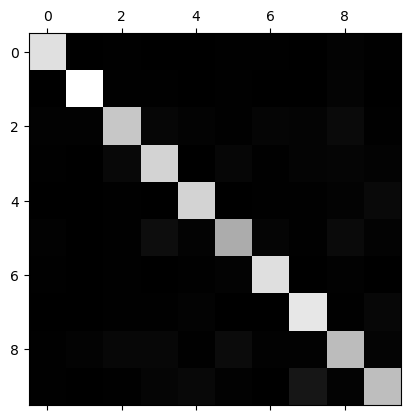

In [35]:
# Most of the numbers are in the diagonal. This means, for example, for an image whose true label is 3,
# the classifier's predicted label is also 3. Off-diagonal values tell where the predictions have gone wrong.

# Confusion matrix is easier to look at as an image:
mpl.pyplot.matshow(conf_matrix, cmap=mpl.cm.gray)

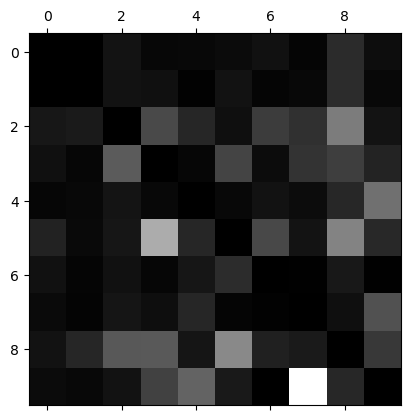

In [36]:
# The confusion matrix is not yet helping us to see where the errors happen.
# With the following modifications, we can make this information more visible:

row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

np.fill_diagonal(norm_conf_matrix, 0)
mpl.pyplot.matshow(norm_conf_matrix, cmap=mpl.cm.gray)
mpl.pyplot.show()

In [ ]:
# If you see vertical light stripes, that means that many images get classified into that label.
# If you see horizontal stripes, that means that images of that label are hard to classify correctly.

# To improve our classifier's performance, we could next do some of the following tasks:
#
#    Use a different classifier than stochastic gradient descent (such as "k nearest neighbours")
#    Fine-tune parameters that govern our classifier's behaviour ("hyperparameter optimisation")
#    Do preprocessing, for example by harmonizing the pixels' brightness levels across images ("scaling")


In [37]:
# Final evaluation using the dataset's test split

# After all the further improvement (which this demo did not do, but which would tasks like ones above)
# you can finally use the test set for performance measurement.

# Let's pretend that our above-used "classifier" would also be our final, optimised classifier.

final_test_predictions = classifier.predict(X_test)

# Find out what the accuracy is on the test set:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_test_predictions)


0.874